In [1]:
import serial
import serial.tools.list_ports
import time
import matplotlib.pyplot as plt
from coincidence_counter_driver import CoincidenceCounter
from motor_driver import MotorDriver

In [2]:
#pip install pyserial

In [3]:
GROUP_NAME = 'Fr 1pm'

In [4]:
ports = serial.tools.list_ports.comports()

for port, desc, hwid in sorted(ports):
        print(f"{port}:\t{desc} [{hwid}]")

COM1:	Communications Port (COM1) [ACPI\PNP0501\0]
COM2:	USB Serial Port (COM2) [USB VID:PID=0403:6001 SER=AL03HCB2A]
COM5:	USB Serial Port (COM5) [USB VID:PID=0403:6001 SER=AH03BN6IA]
COM18:	USB Serial Port (COM18) [USB VID:PID=0403:6001 SER=A601L26VA]


In [5]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import collections
%matplotlib inline

def live_plot(data_dict: dict, x_axis, x_axis_label = '', title='', figsize=(7,5)):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label, data in data_dict.items():
        plt.plot(x_axis, data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel(x_axis_label)
    plt.ylabel('counts')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show()

In [6]:
motor = MotorDriver('COM18')

In [7]:
coin = CoincidenceCounter('COM5')

In [8]:
motor.position = 10

In [9]:
coin.ch1_delay = 0
coin.ch1_delay

'0 ns'

In [10]:
coin.dwell_time = 1.0
coin.dwell_time

'1000 ms'

In [11]:
coin.coincidence_window = 3
coin.coincidence_window

'3 ns'

In [12]:
coin.query("DELA?")

'0 ns'

In [13]:
counts = coin.measure_channels()
print(f" ch1: {counts[0]}\n ch2: {counts[1]}\n coincidences: {counts[2]}")

 ch1: 22252
 ch2: 394816
 coincidences: 758


In [14]:
motor.position = 1
motor.position

10.6776

In [15]:
motor.position

10.6418

# Experiment 3: Temporal sensitivity of bi-photons

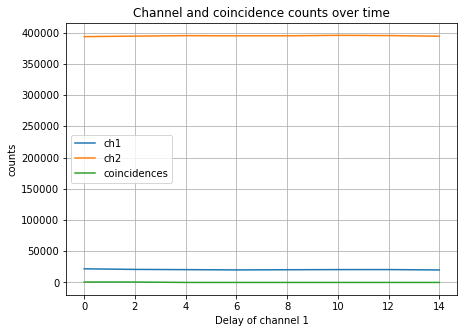

In [16]:
data_dict = {
    'ch1': [],
    'ch2': [],
    'coincidences': []
}
x_axis = []
for i in range(8):
    coin.ch1_delay = int(2*i)
    time.sleep(0.2)
    ch1, ch2, coincidences = coin.measure_channels()
    data_dict['ch1'].append(ch1)
    data_dict['ch2'].append(ch2)
    data_dict['coincidences'].append(coincidences)
    x_axis.append(2*i)
    live_plot(data_dict, x_axis,
              x_axis_label = "Delay of channel 1",
              title = 'Channel and coincidence counts over time')

# Hong-Ou-Mandel (HOM) experiment

In [17]:
coin.measure_channels()

(20655, 394057, 60)

In [18]:
import numpy as np

In [19]:
hom_counts = {
    'ch1': [],
    'ch2': [],
}
hom_coincidences = {
    'coincidences': []
}
x_axis = []

coin.dwell_time = 1.0
coin.coincidence_window = 3
coin.ch1_delay = 0

step = 0.25
steps = np.arange(16, 28+step, step)
print(steps)
steps = np.flip(steps)
for i in steps:
    aim = i
    print(aim)
    motor.position = aim

    t0 = time.time()
    while abs(motor.position - aim) > 0.1:
        print(
            f"Current position is {motor.position:.2f} mm moving to {aim} mm",
            end  = '\r')
        if (time.time()-t0) > 2:
            motor.position = aim
            t0 = time.time()
        time.sleep(0.01)
    ch1, ch2, coincidences = coin.measure_channels()
    hom_counts['ch1'].append(ch1)
    hom_counts['ch2'].append(ch2)
    hom_coincidences['coincidences'].append(coincidences)
    x_axis.append(i)
    live_plot(hom_coincidences, x_axis,
              x_axis_label = "Motor position in mm",
              title = 'Coincidence counts vs motor position')

### SAVE THE DATA
# hom_data = hom_coincidences | hom_counts
# timestr = time.strftime("%Y%m%d-%H%M%S")
# with open(f'data/{GROUP_NAME}_exp4_HOM_{timestr}.txt', 'w') as f:
#     print(hom_data, file=f)

[16.   16.25 16.5  16.75 17.   17.25 17.5  17.75 18.   18.25 18.5  18.75
 19.   19.25 19.5  19.75 20.   20.25 20.5  20.75 21.   21.25 21.5  21.75
 22.   22.25 22.5  22.75 23.   23.25 23.5  23.75 24.   24.25 24.5  24.75
 25.   25.25 25.5  25.75 26.   26.25 26.5  26.75 27.   27.25 27.5  27.75
 28.  ]
28.0


KeyboardInterrupt: 

In [20]:
motor.position = 20

In [21]:
motor.position

27.7265

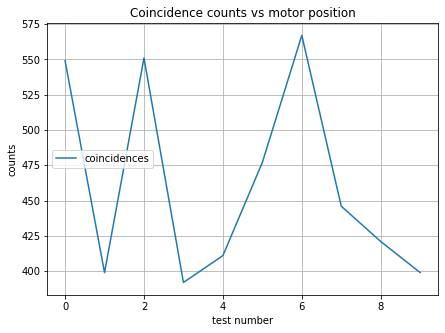

In [99]:
N=10
hom_counts = {
    'ch1': np.zeros(N),
    'ch2': np.zeros(N),
}
hom_coincidences = {
    'coincidences': np.zeros(N)
}
x_axis = np.arange(N)

coin.dwell_time = 1.0
coin.coincidence_window = 3
coin.ch1_delay = 0


        
for i in range (0, N):
    time.sleep(1)
    ch1, ch2, coincidences = coin.measure_channels()
    hom_counts['ch1'][i] = ch1
    hom_counts['ch2'][i] = ch2
    hom_coincidences['coincidences'][i] = coincidences
    live_plot(hom_coincidences, x_axis,
              x_axis_label = "test number",
              title = 'Coincidence counts vs motor position')


In [100]:
maxx = max(hom_coincidences['coincidences'])
minn = min(hom_coincidences['coincidences'])
avg = np.average(hom_coincidences['coincidences'])
std = np.std(hom_coincidences['coincidences'])

print(maxx, minn, avg, std)

567.0 392.0 461.2 66.41505853343803


In [101]:
maxx = max(hom_counts['ch1'])
minn = min(hom_counts['ch1'])
avg = np.average(hom_counts['ch1'])
std = np.std(hom_counts['ch1'])

print(maxx, minn, avg, std)

42290.0 41031.0 41790.2 342.26329046510375


In [102]:
maxx = max(hom_counts['ch2'])
minn = min(hom_counts['ch2'])
avg = np.average(hom_counts['ch2'])
std = np.std(hom_counts['ch2'])

print(maxx, minn, avg, std)

401865.0 396177.0 399445.9 1922.1977239607793


In [ ]:
### SAVE THE DATA
hom_data = hom_coincidences,hom_counts
timestr = time.strftime("%Y%m%d-%H%M%S")
with open(f'data/45000_exp4_HOM_{timestr}.txt', 'w') as f:
    print(hom_data, file=f)